<font color='blue' size=5><b>Mini Project 2 – </b></font><font color='blue' size=5.5><b><u>Consumer Complaint Resolution
    Analysis Using Python</u></b></font>
### Technique 1
#### Insights indicated(**********)

##### Scenario: 
    Product review is the most basic function/factor in resolving customer issues and increasing the sales growth of any product. We can understand their mindset toward our service without asking each customer. When consumers are unhappy with some aspect of a business, they reach out to customer service and might raise a complaint. Companies try their best to resolve the complaints that they receive. However, it might not always be possible to appease every customer. So  Here, we will analyze data, and with the help of different algorithms, we are finding the best classification of customer category so that we can predict our test data. 

#### Objective: 
    Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, Sklearn for model building and performance visualization, and based on the best model, make a prediction for the test file and save the output. 
? The main objective is to predict whether our customer is disputed or not with the help of given data. 

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

<font color='red' size=4><b><u>• Task 1 : Read the Data from the Given csv file.</u></b></font>

In [2]:
# Load and read the dataset both train and test
df_train = pd.read_csv("Consumer_Complaints_train.csv")
df_test =pd.read_csv("Consumer_Complaints_test.csv")

In [3]:
# Display the train file
df_train.head()

Date received                  Product  \
0    2015-10-14         Credit reporting   
1    2015-04-26  Bank account or service   
2    2013-12-20              Credit card   
3    2016-03-03          Debt collection   
4    2015-01-30          Debt collection   

                             Sub-product  \
0                                    NaN   
1             Other bank product/service   
2                                    NaN   
3  Other (i.e. phone, health club, etc.)   
4                                Medical   

                                    Issue  \
0  Incorrect information on credit report   
1                Deposits and withdrawals   
2                                   Other   
3         Disclosure verification of debt   
4         Disclosure verification of debt   

                              Sub-issue  \
0               Information is not mine   
1                                   NaN   
2                                   NaN   
3  Not given enough info to verify debt   
4  Not given enough info to verify debt   

                        Consumer complaint narrative  \
0                                                NaN   
1  RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                             Company public response  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Company has responded to the consumer and the ...   
4                                                NaN   

                                     Company State ZIP code Tags  \
0                                    Equifax    GA    30134  NaN   
1                      Wells Fargo & Company    GA    319XX  NaN   
2                                   Citibank    SC    29203  NaN   
3       FAIR COLLECTIONS & OUTSOURCING, INC.    OH    43082  NaN   
4  HCFS Health Care Financial Services, Inc.    CA    90036  NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0       Consent not provided           Web           2015-10-14   
1           Consent provided           Web           2015-04-26   
2                        NaN         Phone           2014-01-03   
3                        NaN      Referral           2016-03-04   
4                        NaN           Web           2015-01-30   

      Company response to consumer Timely response? Consumer disputed?  \
0          Closed with explanation              Yes                 No   
1          Closed with explanation              Yes                Yes   
2  Closed with non-monetary relief              Yes                 No   
3          Closed with explanation              Yes                 No   
4          Closed with explanation              Yes                Yes   

   Complaint ID  
0       1605653  
1       1347613  
2        640394  
3       1815134  
4       1218613

In [4]:
# Display the test file with first five rows(using head function)
df_test.head()

Date received          Product                            Sub-product  \
0    2015-01-17      Credit card                                    NaN   
1    2016-06-22    Consumer Loan                             Title loan   
2    2015-09-04      Credit card                                    NaN   
3    2016-05-17    Consumer Loan                       Installment loan   
4    2016-07-07  Debt collection  Other (i.e. phone, health club, etc.)   

                                   Issue  \
0  Customer service / Customer relations   
1           Payment to acct not credited   
2          Credit line increase/decrease   
3    Problems when you are unable to pay   
4    Improper contact or sharing of info   

                               Sub-issue  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4  Contacted employer after asked not to   

                        Consumer complaint narrative  \
0                                                NaN   
1                                                NaN   
2  I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...   
3  I have asked One Main Financial not to call my...   
4  I have received several calls from a XXXX XXXX...   

                             Company public response  \
0                                                NaN   
1  Company believes it acted appropriately as aut...   
2                                                NaN   
3                                                NaN   
4  Company has responded to the consumer and the ...   

                            Company State ZIP code           Tags  \
0                          Citibank    TX    75241            NaN   
1  Larsen MacColl Partners II, L.P.    TX    76548  Servicemember   
2                       Capital One    NC    271XX            NaN   
3   OneMain Financial Holdings, LLC    MO    634XX            NaN   
4              GMA Investments, LLC    SC    296XX            NaN   

  Consumer consent provided? Submitted via Date sent to company  \
0                        NaN           Web           2015-01-17   
1                        NaN         Phone           2016-06-22   
2           Consent provided           Web           2015-09-04   
3           Consent provided           Web           2016-05-20   
4           Consent provided           Web           2016-07-07   

      Company response to consumer Timely response?  Complaint ID  
0      Closed with monetary relief              Yes       1198133  
1          Closed with explanation              Yes       1979989  
2          Closed with explanation              Yes       1552090  
3  Closed with non-monetary relief              Yes       1929306  
4          Closed with explanation              Yes       2001667

#### **********With the above code read both the dataset train and test and store into the variable df_train and df_test.

<font color='red' size=4><b><u>• Task 2:  Check the data type for both data (test file and train file) </u></b></font>

In [5]:
# Check the datatype of train file
print("1. Shape of Train dataset :- ", df_train.shape)

print("...............................................................")
print("2. Datatypes of Train dataset :- ")
print()
print(df_train.dtypes)
print()
print("...............................................................")
print("3. All other information of train dataset :- ")
print()
print(df_train.info())

1. Shape of Train dataset :-  (358810, 18)
...............................................................
2. Datatypes of Train dataset :- 

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

...............................................................
3. All other information of train dataset :- 

<class 'pandas.core.frame.Data

### *******The train dataset has
    1 Total_rows = 358810
    2 Total_columns = 18

In [6]:
# Check the datatypes of test files
print("1. Shape of Train dataset :- ", df_test.shape)

print("...............................................................")
print("2. Datatypes of Train dataset :- ")
print()
print(df_test.dtypes)
print()
print("...............................................................")
print("3. All other information of train dataset :- ")
print()
print(df_test.info())

1. Shape of Train dataset :-  (119606, 17)
...............................................................
2. Datatypes of Train dataset :- 

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

...............................................................
3. All other information of train dataset :- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 t

### *****The test dataset has
    1 Total_rows = 119606
    2 Total_columns = 17

In [7]:
# Concating both the train and test dataframes for the further analysis
concat_df = pd.concat([df_train, df_test],ignore_index=True)

In [8]:
# Shape of the Concatenated file
print("Shape of concat_df = ",concat_df.shape)
# Display the concatenated file 
concat_df.head(2)

Shape of concat_df =  (478416, 18)


Date received                  Product                 Sub-product  \
0    2015-10-14         Credit reporting                         NaN   
1    2015-04-26  Bank account or service  Other bank product/service   

                                    Issue                Sub-issue  \
0  Incorrect information on credit report  Information is not mine   
1                Deposits and withdrawals                      NaN   

                        Consumer complaint narrative Company public response  \
0                                                NaN                     NaN   
1  RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...                     NaN   

                 Company State ZIP code Tags Consumer consent provided?  \
0                Equifax    GA    30134  NaN       Consent not provided   
1  Wells Fargo & Company    GA    319XX  NaN           Consent provided   

  Submitted via Date sent to company Company response to consumer  \
0           Web           2015-10-14      Closed with explanation   
1           Web           2015-04-26      Closed with explanation   

  Timely response? Consumer disputed?  Complaint ID  
0              Yes                 No       1605653  
1              Yes                Yes       1347613

#### ******** Using above code, Concatenating both the Train and Test Dataframes in one for further Analysis

<font color='red' size=3><b><u>•Task 3: Do missing value analysis and drop columns where more than 25% of data are missing</u> </b></font>

In [9]:
# Calculating Null Count and Percentage of data
null_per = concat_df.isnull().sum()/concat_df.shape[0]

df = pd.DataFrame({"count" : concat_df.isnull().sum(), "percentage" : round((concat_df.isnull().sum()/concat_df.shape[0]),2)})
df

count  percentage
Date received                      0        0.00
Product                            0        0.00
Sub-product                   138469        0.29
Issue                              0        0.00
Sub-issue                     292624        0.61
Consumer complaint narrative  403322        0.84
Company public response       388025        0.81
Company                            0        0.00
State                           3839        0.01
ZIP code                        3848        0.01
Tags                          411213        0.86
Consumer consent provided?    342929        0.72
Submitted via                      0        0.00
Date sent to company               0        0.00
Company response to consumer       0        0.00
Timely response?                   0        0.00
Consumer disputed?            119606        0.25
Complaint ID                       0        0.00

In [10]:
# Removing NAN
# Extract the columns which contain more than 25% of null data in form of list using for loop
drop_col=[]
for col in concat_df.columns :
    null_per = round(concat_df[col].isnull().sum()/concat_df.shape[0],2)
    if null_per > 0.25:
        drop_col.append(col)
        
print("Columns contain more than 25% of null data : - ")        
print("\n",drop_col)

Columns contain more than 25% of null data : - 

 ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']


In [11]:
# After extracting drop the columns with more nan data
concat_df.drop(drop_col, axis=1, inplace=True)

In [12]:
print("The shape of concatenated dataframe after dropping columns which containd more than 25% Nan  : ")
print(concat_df.shape)

The shape of concatenated dataframe after dropping columns which containd more than 25% Nan  : 
(478416, 12)


#### ********As Drop that columns which contain more than 25% null data from Concated dataframe (observe using reduce the col count  also)

<font color='red' size=3><b><u>• Task 4: Extracting Day, Month, and Year from Date Received Column and create new fields for a
    month, year, and day </u></b></font>

In [13]:
# For Concatenated dataset

# Convert datatype of "Date received" column object to datetime
concat_df["Date received"]=pd.to_datetime(concat_df["Date received"])

In [14]:
# Display the datatype of columns in concatenated dataframe
concat_df.dtypes

Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company                    object
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
dtype: object

In [15]:
# For Concatenated Dataset\
# Extracting the day month and year from date received column
concat_df["Day"] = concat_df["Date received"].dt.day
concat_df["Month"] = concat_df["Date received"].dt.month
concat_df["Year"] = concat_df["Date received"].dt.year

In [16]:
concat_df.tail(3)

Date received           Product  \
478413    2012-05-15          Mortgage   
478414    2015-06-07  Credit reporting   
478415    2015-03-20   Debt collection   

                                           Issue                Company State  \
478413  Loan modification,collection,foreclosure        Bank of America    CA   
478414    Incorrect information on credit report               Experian    OH   
478415                     Communication tactics  Northland Group, Inc.    FL   

       ZIP code Submitted via Date sent to company  \
478413    95691      Referral           2012-05-15   
478414    436XX           Web           2015-06-07   
478415    322XX           Web           2015-03-20   

       Company response to consumer Timely response? Consumer disputed?  \
478413        Closed without relief              Yes                NaN   
478414      Closed with explanation              Yes                NaN   
478415      Closed with explanation              Yes                NaN   

        Complaint ID  Day  Month  Year  
478413         78574   15      5  2012  
478414       1409765    7      6  2015  
478415       1294040   20      3  2015

#### ******** Using above code Extract the day month and year from "Date Received" column and created new column to the dataframe.

<font color='red' size=3><b><u>• Task 5: Calculate the Number of Days the Complaint was with the Company and create a new
    field as “Days held”?</u></b></font>

In [17]:
# Display the columns in concatenated dataframe
concat_df.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Day',
       'Month', 'Year'],
      dtype='object')

In [18]:
# concatnated dataframe
# We have two column "Date received" and "Date sent to company"
# calculate the days that the complaint was with company by substracting

# First convert datatype of "Date sent to company" from dtype 'object' to 'datetime'
concat_df["Date sent to company"]=pd.to_datetime(concat_df["Date sent to company"])

# Calculate and create the new column days held
concat_df["Days held"] = (concat_df["Date sent to company"]-concat_df["Date received"]).dt.days

In [19]:
# Display the concatenate dataframe after calculating the "Days Held"
concat_df.head(2)

Date received                  Product  \
0    2015-10-14         Credit reporting   
1    2015-04-26  Bank account or service   

                                    Issue                Company State  \
0  Incorrect information on credit report                Equifax    GA   
1                Deposits and withdrawals  Wells Fargo & Company    GA   

  ZIP code Submitted via Date sent to company Company response to consumer  \
0    30134           Web           2015-10-14      Closed with explanation   
1    319XX           Web           2015-04-26      Closed with explanation   

  Timely response? Consumer disputed?  Complaint ID  Day  Month  Year  \
0              Yes                 No       1605653   14     10  2015   
1              Yes                Yes       1347613   26      4  2015   

   Days held  
0          0  
1          0

#### ******** Calculated the no of days the complaint was with the company and create the new column 'Days held' store the days

<font color='red' size=3><b><u>• Task 5: Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields</u></b></font>

In [20]:
# Drop unnecessary columns "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"
concat_df = concat_df.drop(columns=["Date received","Date sent to company","ZIP code","Complaint ID"],axis=1)

In [21]:
print("Shape of Concatenate df after dropping the uncessary columns : ")
print("Total Rows : ",concat_df.shape[0])
print("Total Columns : ",concat_df.shape[1])

Shape of Concatenate df after dropping the uncessary columns : 
Total Rows :  478416
Total Columns :  12


#### ********Drop unnecessary columns from the dataframe, are( "Date Received","Date Sent to Company","ZIP Code", "Complaint ID")

<font color='red' size=3><b><u>• Task 6: Imputing Null value in “State” by Mode</u></b></font>


In [22]:
# Cheking the presence of null values in State column
concat_df.isnull().sum()

Product                              0
Issue                                0
Company                              0
State                             3839
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              119606
Day                                  0
Month                                0
Year                                 0
Days held                            0
dtype: int64

#### !.......... Above can see the 'State' column having null values in the dataset ,As count calculate above

In [23]:
# Find the mode of 'State' column
import math 
x = concat_df["State"].mode()
print(x[0])

CA


In [24]:
# Fill the blank values with mode
concat_df["State"].fillna(x[0],inplace=True)

In [25]:
# After imputing values in 'State' column check the null values fill or not?
concat_df.isna().sum()

Product                              0
Issue                                0
Company                              0
State                                0
Submitted via                        0
Company response to consumer         0
Timely response?                     0
Consumer disputed?              119606
Day                                  0
Month                                0
Year                                 0
Days held                            0
dtype: int64

In [26]:
# Display the items in 'State' column to observe that all values are free from NAN and fill with mode
print(list(concat_df["State"].values))

['GA', 'GA', 'SC', 'OH', 'CA', 'FL', 'NJ', 'IL', 'PA', 'CA', 'ID', 'ID', 'UT', 'TX', 'TN', 'NM', 'VA', 'CA', 'FL', 'TN', 'MO', 'CA', 'OH', 'UT', 'KY', 'MN', 'IN', 'UT', 'MD', 'FL', 'CA', 'PA', 'TX', 'CA', 'CA', 'CA', 'FL', 'WI', 'NY', 'IL', 'NJ', 'MD', 'NY', 'CA', 'OH', 'TX', 'FL', 'TX', 'FL', 'MO', 'NJ', 'FL', 'CA', 'TX', 'FL', 'IL', 'KS', 'CA', 'VA', 'CO', 'OH', 'AZ', 'TX', 'OK', 'CA', 'MN', 'TN', 'TN', 'TX', 'MI', 'CO', 'MD', 'FL', 'CT', 'NY', 'FL', 'TX', 'NJ', 'GA', 'MI', 'OH', 'AZ', 'CA', 'TX', 'GA', 'CA', 'FL', 'LA', 'IL', 'IL', 'NY', 'OR', 'CA', 'OR', 'VA', 'NY', 'TN', 'NC', 'MS', 'MD', 'CA', 'FL', 'IL', 'FL', 'LA', 'OH', 'OH', 'NH', 'CA', 'IN', 'CA', 'CA', 'VA', 'CT', 'FL', 'NJ', 'NY', 'AL', 'TX', 'TX', 'MA', 'CA', 'CA', 'NJ', 'CA', 'IL', 'OK', 'TX', 'OH', 'CA', 'PA', 'TX', 'NY', 'WA', 'MI', 'TN', 'CA', 'CA', 'VA', 'CT', 'TX', 'WI', 'AZ', 'FL', 'NJ', 'PA', 'CA', 'DC', 'FL', 'NY', 'OK', 'NM', 'TX', 'IN', 'NJ', 'CA', 'CO', 'PA', 'FL', 'FL', 'GA', 'CA', 'AR', 'IL', 'CA', 'WI', 'TX

#### [******** filled nan values using mode , now the dataset is free from NAN values(The most frequent values is 'CA')],\n
{Except Target column as we concat train and test data but the test data dont have target column so thats why here indicates NaN for test_data only...ignore for this time}

<font color='red' size=3><b><u>• Task 7: With the help of the days we calculated above, create a new field 'Week_Received' where
    we calculate the week based on the day of receiving.</u></b></font>

In [27]:
# Calculate and create 'Week Received' 
concat_df["Week_Received"] = pd.to_datetime(concat_df[["Year","Month","Day"]]).dt.isocalendar().week

In [28]:
# Display the dataframe check 'Week_Received ' is calculated
concat_df.head(2)

Product                                   Issue  \
0         Credit reporting  Incorrect information on credit report   
1  Bank account or service                Deposits and withdrawals   

                 Company State Submitted via Company response to consumer  \
0                Equifax    GA           Web      Closed with explanation   
1  Wells Fargo & Company    GA           Web      Closed with explanation   

  Timely response? Consumer disputed?  Day  Month  Year  Days held  \
0              Yes                 No   14     10  2015          0   
1              Yes                Yes   26      4  2015          0   

   Week_Received  
0             42  
1             17

#### *******Calculate the 'Week Received' and store the result by creating new column into previous dataframe

<font color='red' size=3><b><u>• Task 8: store data of disputed people into the “disputed_cons” variable for future tasks</u></b></font>

In [29]:
# Calculating all the data where the consumer found disputed and store into new variable
disputed_cust = concat_df[concat_df["Consumer disputed?"] == "Yes"]
disputed_cust.head(2)

Product                            Issue  \
1  Bank account or service         Deposits and withdrawals   
4          Debt collection  Disclosure verification of debt   

                                     Company State Submitted via  \
1                      Wells Fargo & Company    GA           Web   
4  HCFS Health Care Financial Services, Inc.    CA           Web   

  Company response to consumer Timely response? Consumer disputed?  Day  \
1      Closed with explanation              Yes                Yes   26   
4      Closed with explanation              Yes                Yes   30   

   Month  Year  Days held  Week_Received  
1      4  2015          0             17  
4      1  2015          0              5

#### ********Filter the DataFrame where "Consumer Disputed?" is 'Yes' and store it in the "disputed_cons" variable.

<font color='red' size=3><b><u>• Task 9: Plot bar graph of the total no of disputes of consumers with the help of seaborn</u></b></font>

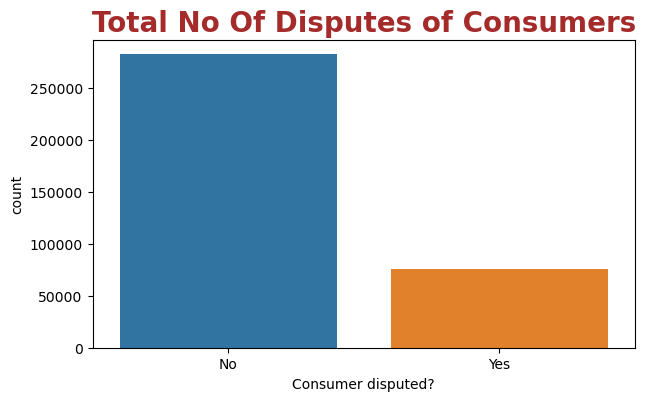

In [30]:
plt.figure(figsize=(7,4))
sns.countplot(x="Consumer disputed?", data=concat_df)
plt.title("Total No Of Disputes of Consumers", fontweight='bold',color='brown',size=20)
plt.show()

In [31]:
concat_df["Consumer disputed?"].value_counts()

Consumer disputed?
No     282638
Yes     76172
Name: count, dtype: int64

#### ********The Total number of consumers disputed is 76172 visualize using seaborn countplot

<font color='red' size=3><b><u>• Task 10: Plot bar graph of the total no of disputes products-wise with the help of seaborn</u></b></font>

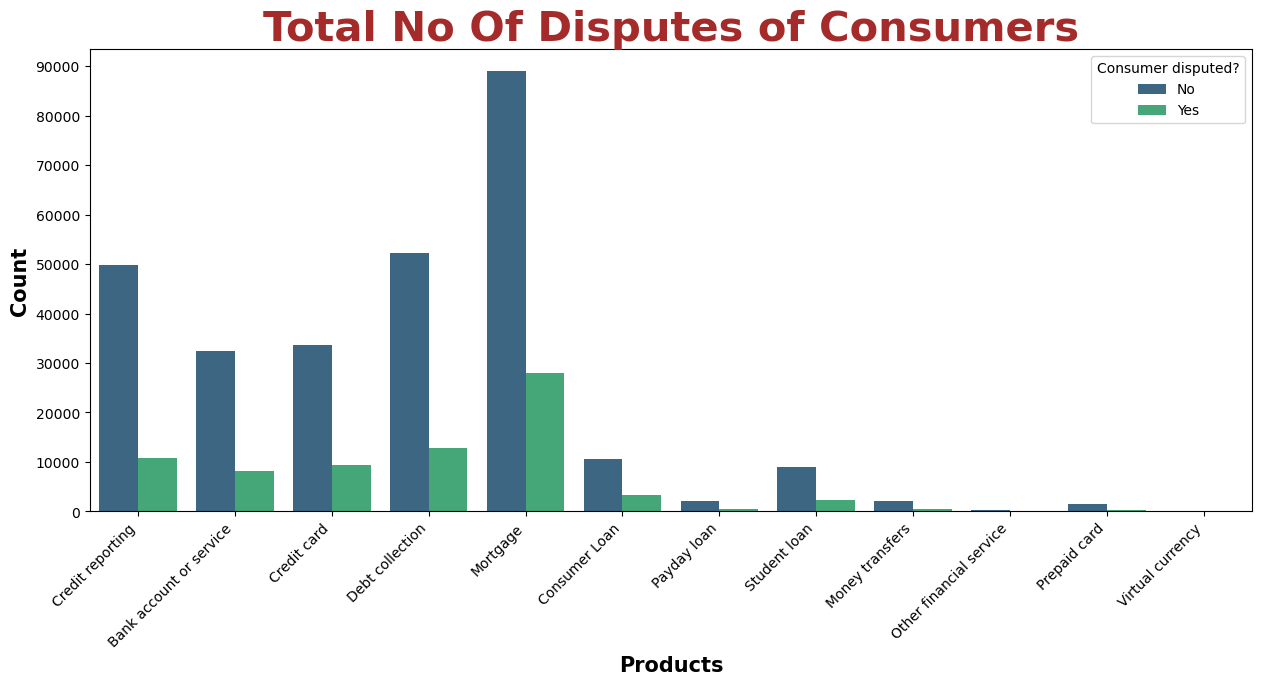

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=concat_df,x="Product",hue="Consumer disputed?",palette='viridis')
plt.title("Total No Of Disputes of Consumers", fontweight='bold',color='brown',size=30)
plt.yticks(np.arange(0,95000,10000))
plt.xticks(rotation=45,ha='right')
plt.xlabel("Products",fontweight='bold',color='k',size=15)
plt.ylabel("Count",fontweight='bold',color='k',size=15)
plt.show()

#### ********As Observed maximum customer disputed with using product 'Mortgage'

<font color='red' size=3><b><u>• Task 11: Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the
    help of seaborn</u></b></font>

In [33]:
Issues_highest_disputes = disputed_cust.groupby("Issue")["Consumer disputed?"].count().sort_values(ascending=False)

In [34]:
top_10_issues = Issues_highest_disputes.head(10)

In [35]:
top_10_issues

Issue
Loan modification,collection,foreclosure    13937
Loan servicing, payments, escrow account     9503
Incorrect information on credit report       7063
Cont'd attempts collect debt not owed        5223
Account opening, closing, or management      3804
Disclosure verification of debt              3000
Application, originator, mortgage broker     2342
Deposits and withdrawals                     2200
Credit reporting company's investigation     1936
Billing disputes                             1628
Name: Consumer disputed?, dtype: int64

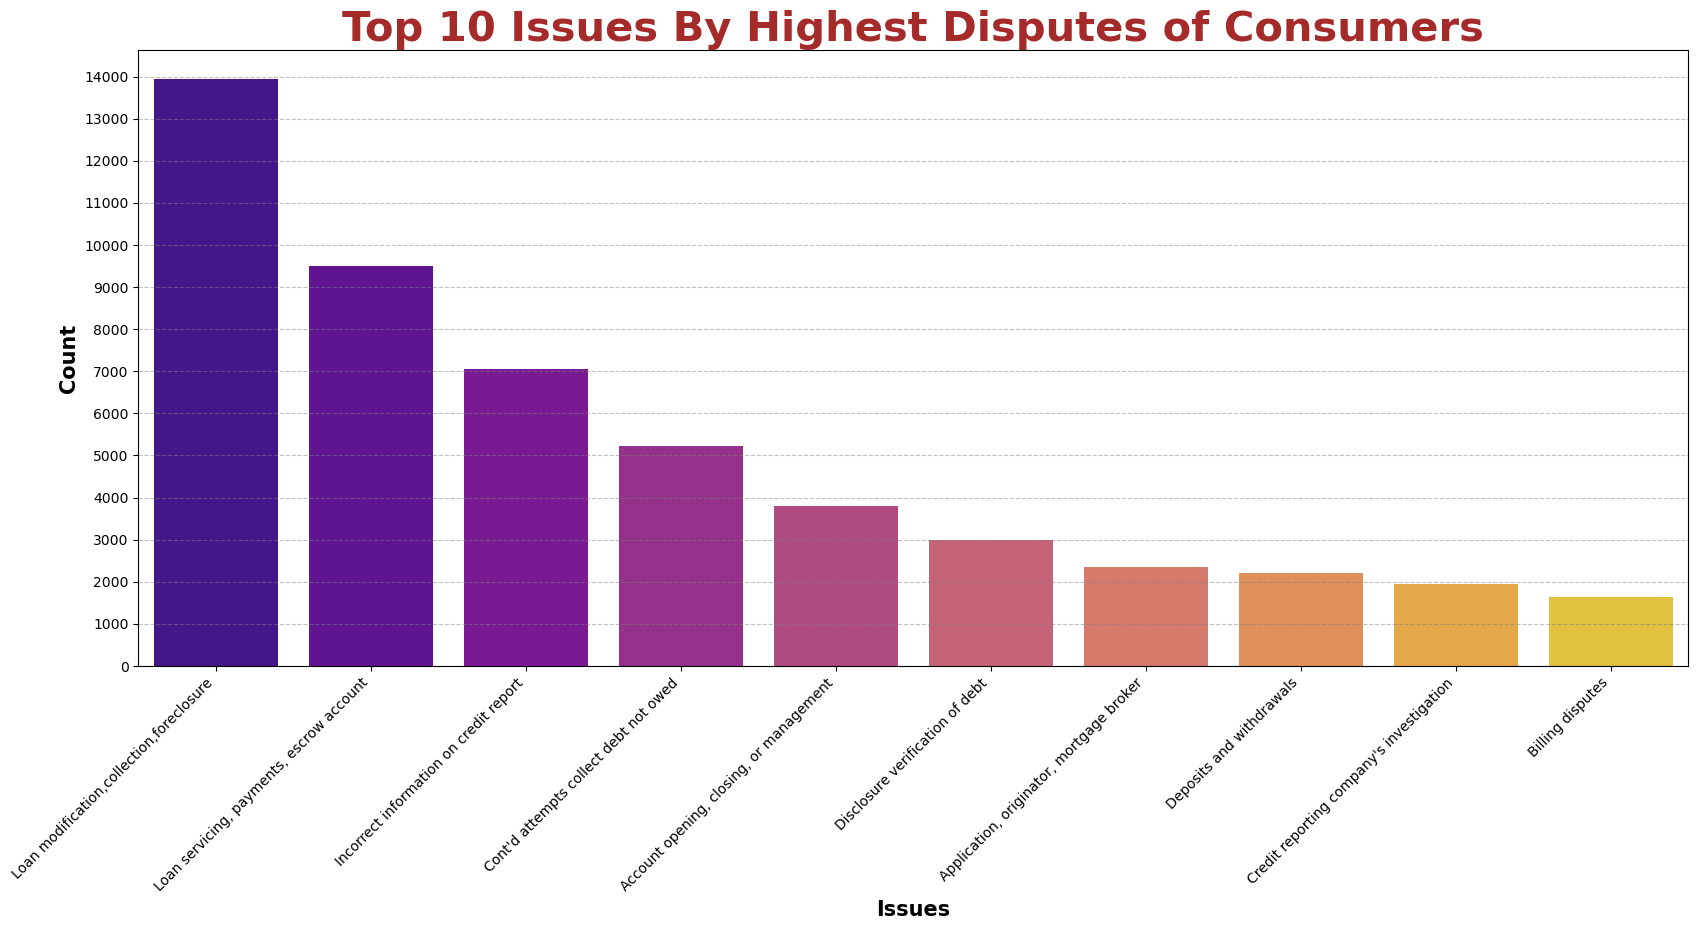

In [36]:
plt.figure(figsize=(20,8))
sns.barplot(x=top_10_issues.index,y=top_10_issues.values,palette='plasma')
plt.title("Top 10 Issues By Highest Disputes of Consumers", fontweight='bold',color='brown',size=30)
plt.yticks(np.arange(0,14500,1000))
plt.xticks(rotation=45,ha='right')
plt.xlabel("Issues",fontweight='bold',color='k',size=15)
plt.ylabel("Count",fontweight='bold',color='k',size=15)
plt.grid(axis='y',linestyle="--",color="gray",alpha=0.5)
plt.show()

<font color='red' size=3><b><u>• Task 12: Plot bar graph of the total no of disputes by State with Maximum Disputes</u></b></font>

In [37]:
State_highest_disputes = disputed_cust.groupby("State")["Consumer disputed?"].count().sort_values(ascending=False)
top_10_State = State_highest_disputes.head(10)
top_10_State

State
CA    12217
FL     7152
TX     5262
NY     5001
GA     3302
NJ     3101
IL     2813
VA     2687
PA     2640
MD     2585
Name: Consumer disputed?, dtype: int64

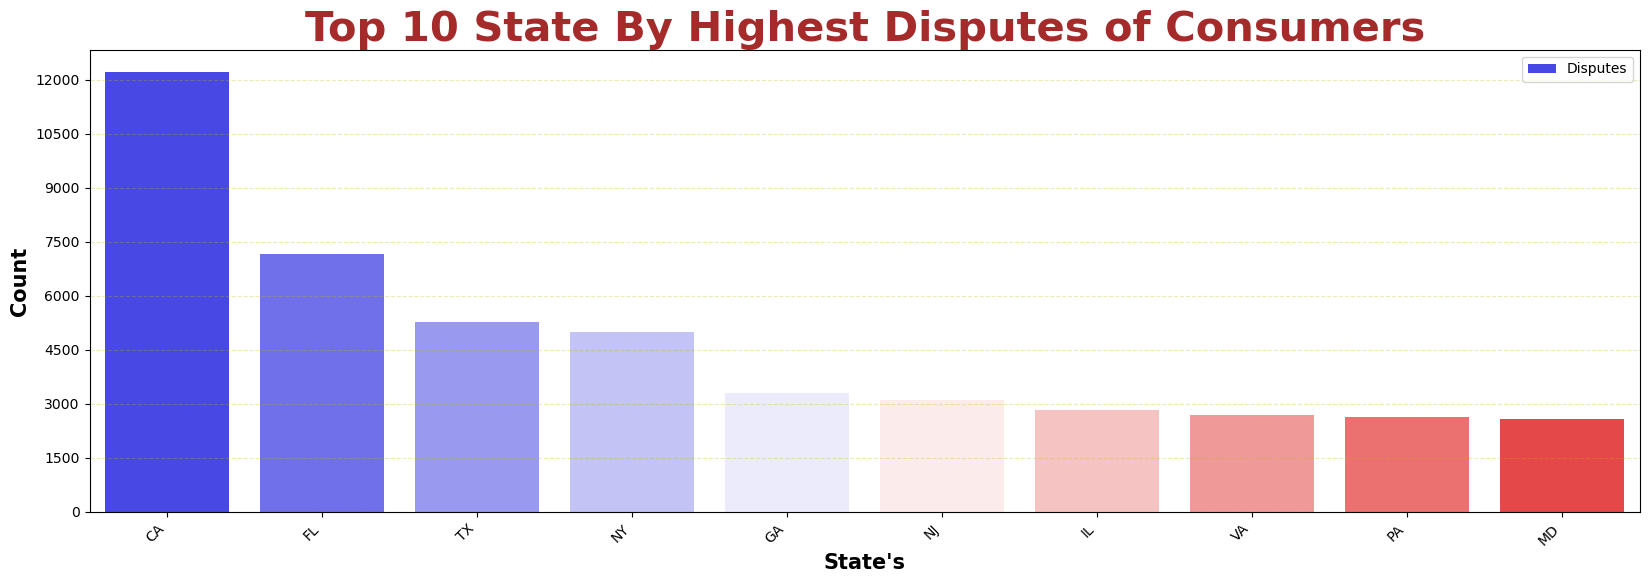

In [38]:
plt.figure(figsize=(20,6))
sns.barplot(x=top_10_State.index,y=top_10_State.values,palette='bwr',label="Disputes")
plt.title("Top 10 State By Highest Disputes of Consumers", fontweight='bold',color='brown',size=30)
plt.yticks(np.arange(0,13500,1500))
plt.xticks(rotation=45,ha='right')
plt.xlabel("State's",fontweight='bold',color='k',size=15)
plt.ylabel("Count",fontweight='bold',color='k',size=15)
plt.grid(axis='y',linestyle="--",color="y",alpha=0.3)
plt.legend()
plt.show()

<font color='red' size=3><b><u>• Task 13: Plot bar graph of the total no of disputes Submitted Via different source</u></b></font>

In [39]:
disputes_source = disputed_cust.groupby("Submitted via")["Consumer disputed?"].count().sort_values(ascending=False)

In [40]:
disputes_source

Submitted via
Web            55001
Referral       12066
Phone           4456
Postal mail     3497
Fax             1117
Email             35
Name: Consumer disputed?, dtype: int64

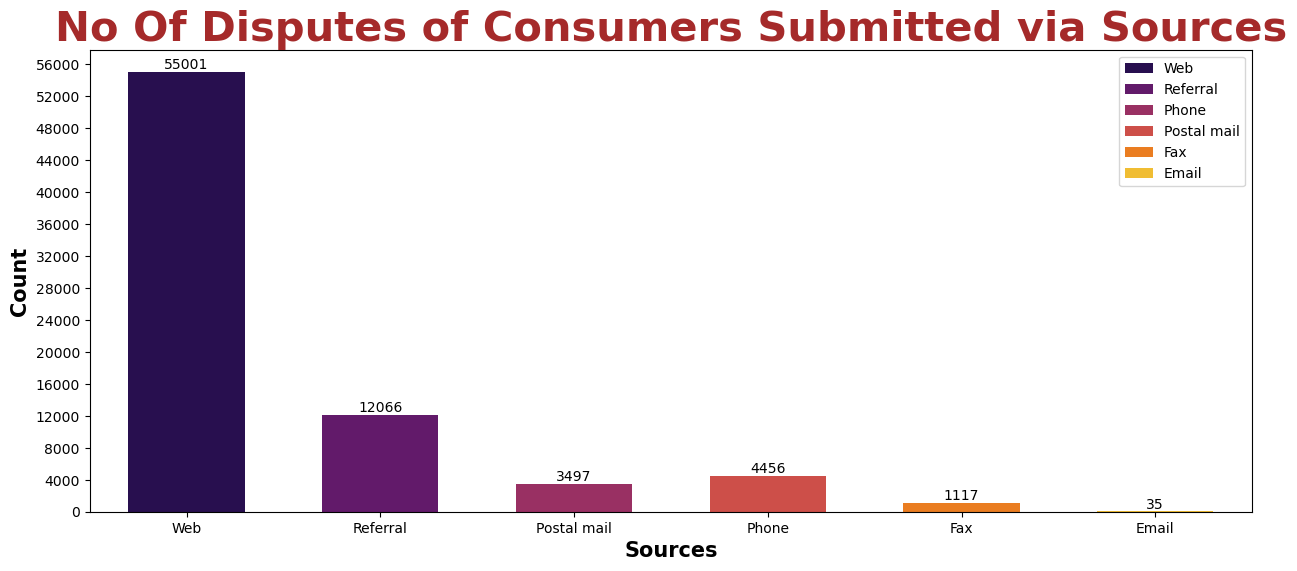

In [41]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data=disputed_cust,x="Submitted via",palette='inferno',saturation=0.9,width=0.6,label=disputes_source.index)
ax.bar_label(ax.containers[0])
plt.title("No Of Disputes of Consumers Submitted via Sources", fontweight='bold',color='brown',size=30)
plt.yticks(np.arange(0,57000,4000))
plt.xlabel("Sources",fontweight='bold',color='k',size=15)
plt.ylabel("Count",fontweight='bold',color='k',size=15)
plt.legend()
plt.show()

<font color='red' size=3><b><u>• Task 14: Plot bar graph of the total no of disputes where the Company's Response to the
    Complaints</u></b></font>

In [42]:
disputes_response = disputed_cust.groupby("Company response to consumer")["Consumer disputed?"].count()

In [43]:
disputes_response

Company response to consumer
Closed                              1928
Closed with explanation            62108
Closed with monetary relief         2864
Closed with non-monetary relief     5987
Closed with relief                   426
Closed without relief               2859
Name: Consumer disputed?, dtype: int64

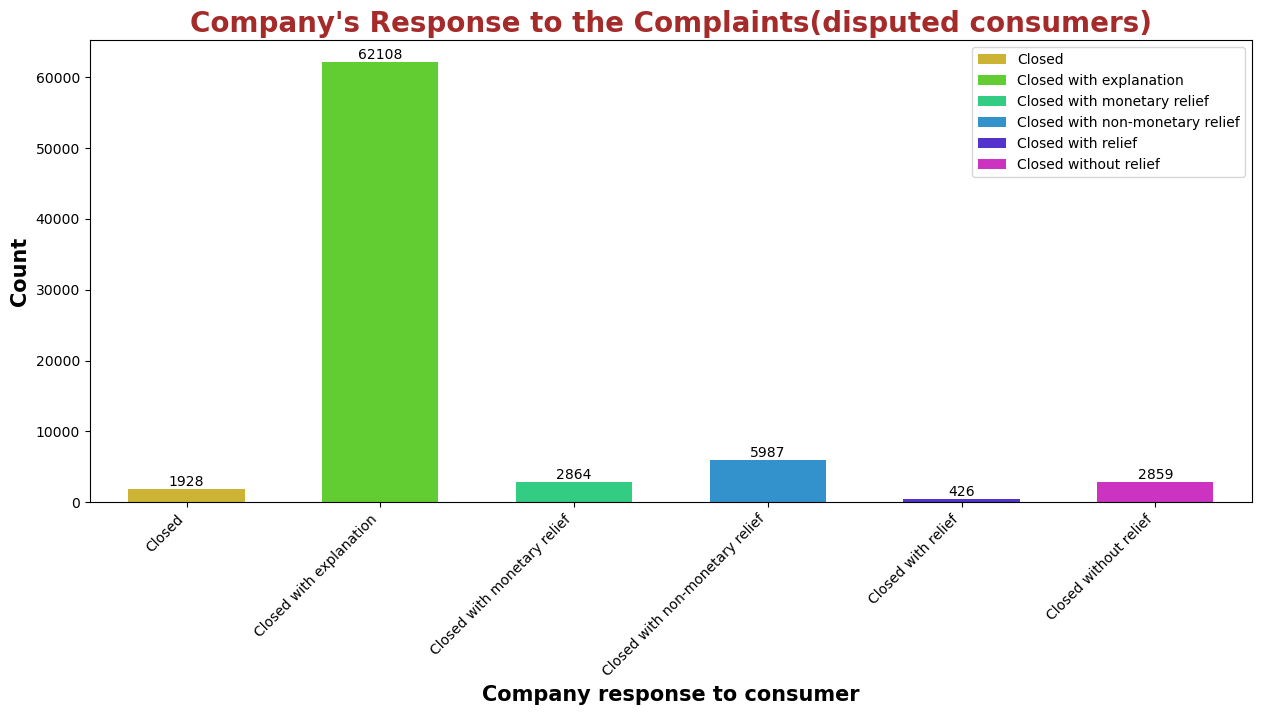

In [44]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=disputes_response.index,y=disputes_response.values,width=0.6,palette="hsv",errcolor='blue',label=disputes_response.index, saturation=0.6)
ax.bar_label(ax.containers[0])
plt.ylabel("Count",fontweight='bold',color='k',size=15)
plt.xlabel("Company response to consumer",fontweight='bold',color='k',size=15)
plt.xticks(rotation=45,ha='right')
plt.title("Company's Response to the Complaints(disputed consumers)", fontweight='bold',color='brown',size=20)
plt.legend()
plt.show()

<font color='red' size=3><b><u>• Task 15: Plot bar graph of the total no of disputes where the Company's Response Leads to
    Disputes</u></b></font>

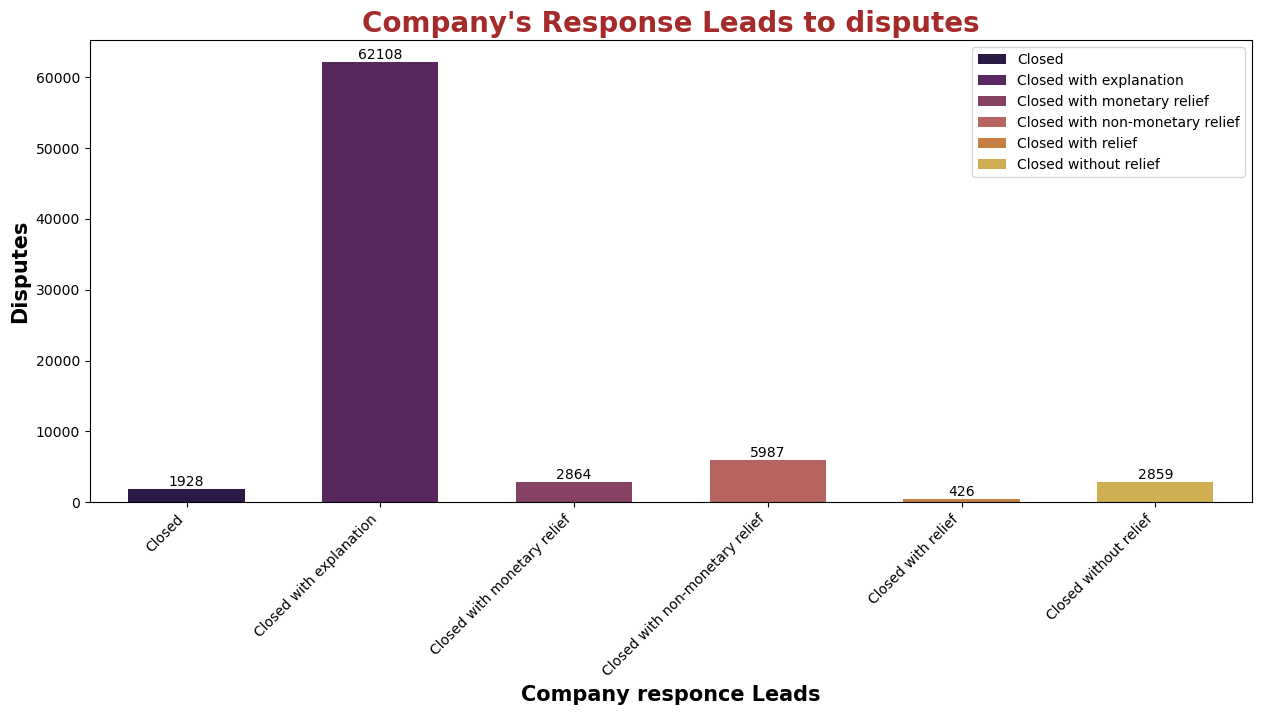

In [45]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=disputes_response.index,y=disputes_response.values,width=0.6,palette="inferno",errcolor='blue',label=disputes_response.index, saturation=0.6)
ax.bar_label(ax.containers[0])
plt.ylabel("Disputes",fontweight='bold',color='k',size=15)
plt.xlabel("Company responce Leads",fontweight='bold',color='k',size=15)
plt.xticks(rotation=45,ha='right')
plt.title("Company's Response Leads to disputes", fontweight='bold',color='brown',size=20)
plt.legend()
plt.show()

<font color='red' size=3><b><u>• Task 16: Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely
    Response</u></b></font>

In [46]:
disputes_Companyresponse = disputed_cust.groupby("Timely response?")["Consumer disputed?"].count()

In [47]:
disputes_Companyresponse

Timely response?
No      1229
Yes    74943
Name: Consumer disputed?, dtype: int64

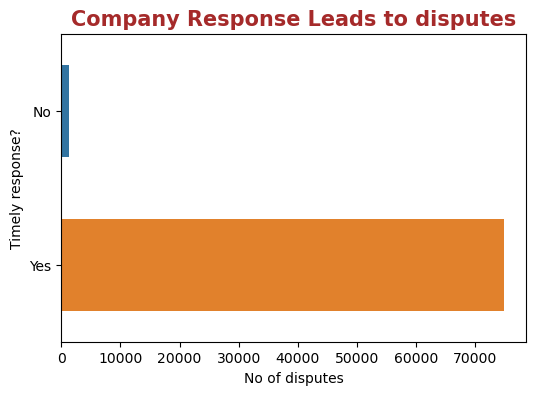

In [48]:
# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=disputes_Companyresponse.values,y=disputes_Companyresponse.index,width=0.6,orient="h")
plt.xlabel("No of disputes",color='k',size=10)
plt.title("Company Response Leads to disputes", fontweight='bold',color='brown',size=15)
plt.show()

<font color='red' size=3><b><u>• Task 17: Plot bar graph of the total no of disputes over Year Wise Complaints</u></b></font>

In [49]:
disputes_year_compaints = disputed_cust.groupby("Year")["Issue"].count()

In [50]:
disputes_year_compaints

Year
2011      346
2012     9830
2013    13615
2014    17814
2015    20580
2016    13987
Name: Issue, dtype: int64

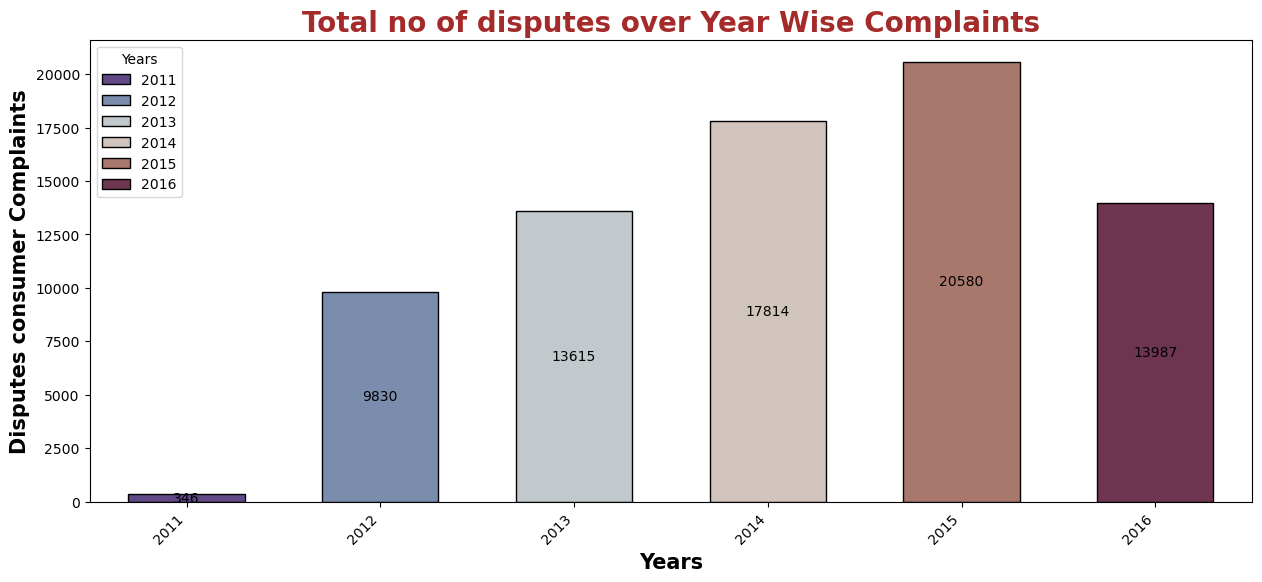

In [51]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=disputes_year_compaints.index,y=disputes_year_compaints.values,width=0.6,palette="twilight_shifted",edgecolor='black',label=disputes_year_compaints.index, saturation=0.6)
ax.bar_label(ax.containers[0],label_type='center')
plt.ylabel("Disputes consumer Complaints",fontweight='bold',color='k',size=15)
plt.xlabel("Years",fontweight='bold',color='k',size=15)
plt.xticks(rotation=45,ha='right')
plt.title("Total no of disputes over Year Wise Complaints", fontweight='bold',color='brown',size=20)
plt.legend(loc="upper left",title="Years")
plt.show()

<font color='red' size=3><b><u>• Task 18: Plot bar graph of the total no of disputes over Year Wise Disputes</u></b></font>

In [52]:
disputes_per_year = disputed_cust.groupby("Year")["Consumer disputed?"].count().sort_values(ascending=False)

In [53]:
disputes_per_year

Year
2015    20580
2014    17814
2016    13987
2013    13615
2012     9830
2011      346
Name: Consumer disputed?, dtype: int64

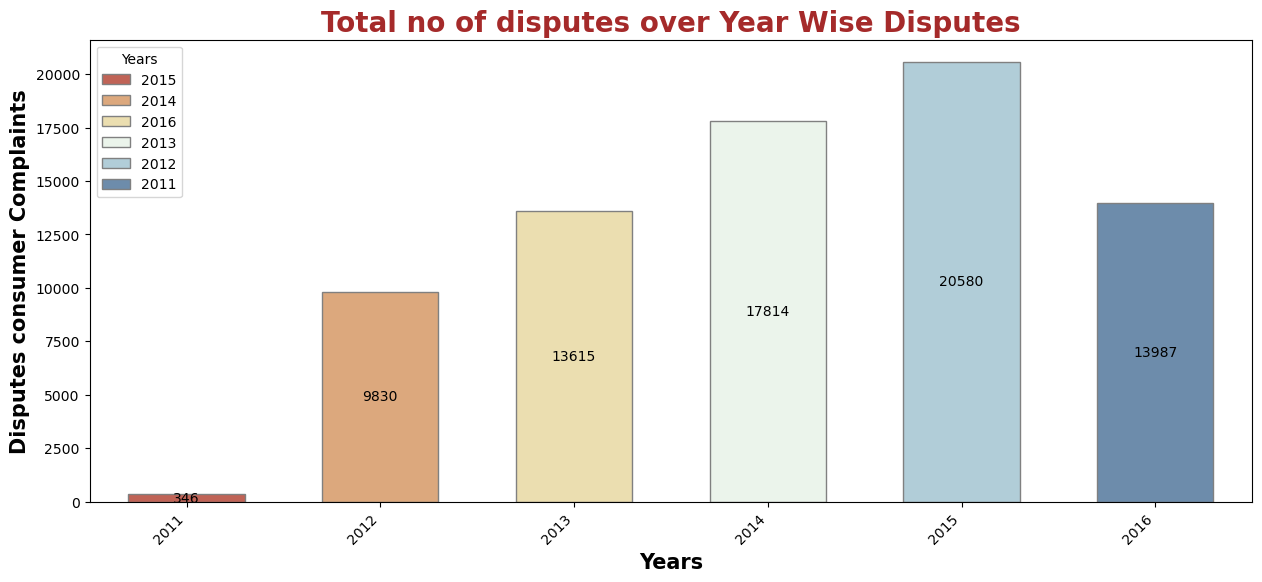

In [54]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=disputes_per_year.index,y=disputes_per_year.values,width=0.6,palette="RdYlBu",edgecolor='gray',label=disputes_per_year.index, saturation=0.6)
ax.bar_label(ax.containers[0],label_type='center')
plt.ylabel("Disputes consumer Complaints",fontweight='bold',color='k',size=15)
plt.xlabel("Years",fontweight='bold',color='k',size=15)
plt.xticks(rotation=45,ha='right')
plt.title("Total no of disputes over Year Wise Disputes", fontweight='bold',color='brown',size=20)
plt.legend(loc="upper left",title="Years")
plt.show()

<font color='red' size=3><b><u>• Task 19: Plot bar graph of Top Companies with Highest Complaints</u></b></font>

In [55]:
companies_high_complaints = concat_df.groupby("Company")["Issue"].count().sort_values(ascending=False)
top_10_company_highestcompaints = companies_high_complaints.head(10)
top_10_company_highestcompaints

Company
Bank of America                           46336
Wells Fargo & Company                     35453
JPMorgan Chase & Co.                      28852
Equifax                                   28831
Experian                                  26792
TransUnion Intermediate Holdings, Inc.    22508
Citibank                                  22300
Ocwen                                     17475
Capital One                               13396
Nationstar Mortgage                       11278
Name: Issue, dtype: int64

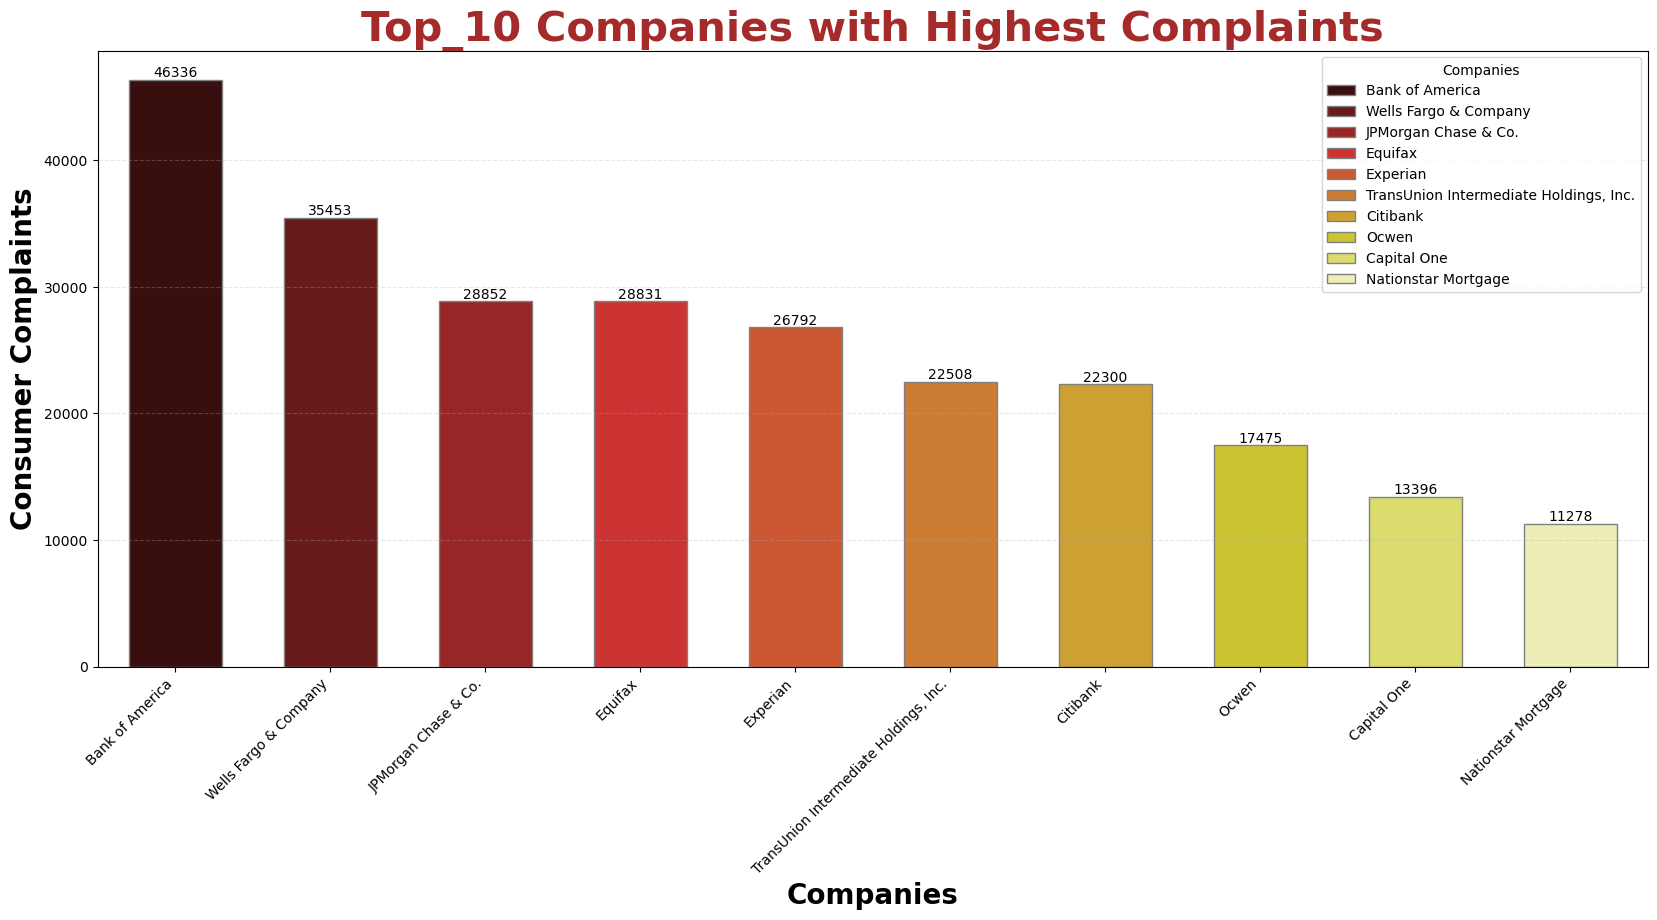

In [56]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x=top_10_company_highestcompaints.index,y=top_10_company_highestcompaints.values,width=0.6,palette="hot",edgecolor='gray',label=top_10_company_highestcompaints.index, saturation=0.6)
ax.bar_label(ax.containers[0],label_type='edge')
plt.ylabel("Consumer Complaints",fontweight='bold',color='k',size=20)
plt.xlabel("Companies",fontweight='bold',color='k',size=20)
plt.xticks(rotation=45,ha='right')
plt.title("Top_10 Companies with Highest Complaints", fontweight='bold',color='brown',size=30)
plt.legend(loc="upper right",title="Companies")
plt.grid(True,axis="y",linestyle="--",alpha=0.3)
plt.show()

<font color='red' size=3><b><u>• Task 20: Convert all negative days held to zero (it is the time taken by the authority that can't be
    negative)</u></b></font>

In [57]:
concat_df.head(1)

Product                                   Issue  Company State  \
0  Credit reporting  Incorrect information on credit report  Equifax    GA   

  Submitted via Company response to consumer Timely response?  \
0           Web      Closed with explanation              Yes   

  Consumer disputed?  Day  Month  Year  Days held  Week_Received  
0                 No   14     10  2015          0             42

In [58]:
# Convert all negative days to 0 using lambda(It compare the each value with 0 , which is max if x is max then it return original values if not the, return 0)
concat_df["Days held"] = concat_df["Days held"].apply(lambda x : max(x,0))

In [59]:
print(list(concat_df["Days held"].values))

[0, 0, 14, 1, 0, 5, 0, 0, 0, 7, 0, 4, 0, 0, 0, 0, 0, 20, 1, 7, 6, 3, 2, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 3, 3, 0, 7, 5, 0, 2, 5, 0, 6, 0, 0, 0, 5, 5, 1, 0, 0, 0, 2, 0, 6, 2, 0, 18, 11, 2, 0, 0, 0, 0, 5, 74, 7, 10, 32, 0, 3, 6, 4, 3, 0, 1, 0, 0, 0, 8, 0, 0, 4, 7, 0, 11, 1, 5, 0, 0, 5, 0, 1, 0, 0, 3, 2, 1, 2, 3, 36, 5, 0, 1, 6, 1, 0, 1, 0, 2, 0, 2, 0, 4, 1, 0, 2, 0, 5, 1, 0, 5, 6, 0, 3, 6, 0, 3, 1, 0, 6, 0, 0, 4, 4, 0, 0, 0, 5, 0, 4, 1, 2, 3, 3, 1, 0, 0, 18, 2, 3, 0, 0, 3, 1, 5, 0, 0, 28, 0, 5, 4, 4, 0, 2, 7, 0, 0, 5, 0, 20, 4, 2, 0, 10, 0, 1, 0, 7, 7, 0, 5, 7, 4, 0, 0, 0, 2, 9, 2, 38, 4, 2, 0, 5, 0, 0, 3, 3, 1, 0, 0, 27, 2, 0, 0, 4, 0, 0, 1, 1, 2, 0, 0, 2, 0, 6, 0, 0, 0, 5, 2, 0, 3, 0, 0, 1, 48, 4, 0, 1, 0, 5, 5, 5, 0, 0, 7, 0, 0, 3, 18, 55, 10, 2, 6, 0, 1, 5, 3, 10, 0, 0, 0, 7, 6, 0, 33, 0, 0, 5, 0, 0, 0, 2, 2, 2, 2, 0, 7, 5, 34, 2, 0, 0, 0, 0, 2, 2, 1, 0, 6, 3, 13, 5, 0, 0, 11, 4, 5, 0, 1, 9, 5, 0, 2, 0, 14, 4, 5, 0, 12, 1, 0, 0, 8, 0, 5, 6, 11, 1, 1, 10, 4, 7, 4, 5, 1, 0, 0, 2,

<font color='red' size=3><b><u>• Task 21: Drop Unnecessary Columns for the Model Building
    like:'Company', 'State', 'Year_Received', 'Days_held'</u></b></font>

In [60]:
concat_df_clean = concat_df.drop(["Company","State","Days held","Year"],axis=1)

In [61]:
concat_df_clean.head(2)

Product                                   Issue  \
0         Credit reporting  Incorrect information on credit report   
1  Bank account or service                Deposits and withdrawals   

  Submitted via Company response to consumer Timely response?  \
0           Web      Closed with explanation              Yes   
1           Web      Closed with explanation              Yes   

  Consumer disputed?  Day  Month  Week_Received  
0                 No   14     10             42  
1                Yes   26      4             17

#### ********With the above code drop the unnecessary columns which are not required for model building

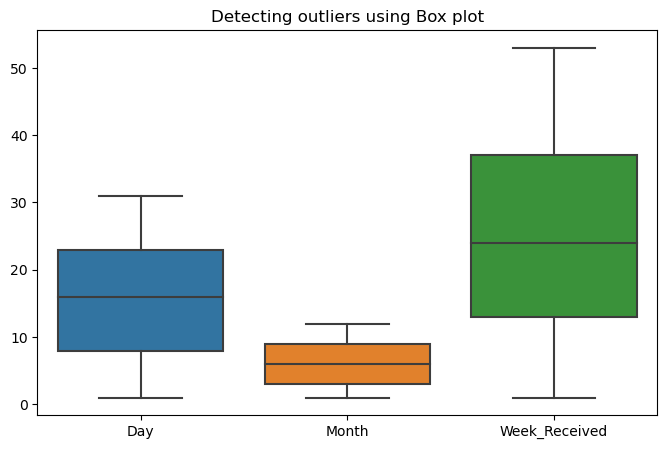

In [62]:
# Detecting outliers
plt.figure(figsize=(8,5))
sns.boxplot(concat_df_clean)
plt.title("Detecting outliers using Box plot")
plt.show()

#### ********Above numerical data does not contain outliers

<font color='red' size=3><b>• Task 22: Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)</b></font>

In [63]:
# To build the model we use the target variable as it is a categorical column
print("Categories of Target variable :-")
print(concat_df_clean["Consumer disputed?"].value_counts())

# Unique values in target variable
print("\nUnique values : ",concat_df_clean["Consumer disputed?"].unique())

# Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)
concat_df_clean["Consumer disputed?"] = concat_df_clean["Consumer disputed?"].map({"Yes":1,"No":0})
# print the train dataset
concat_df_clean.head()

Categories of Target variable :-
Consumer disputed?
No     282638
Yes     76172
Name: count, dtype: int64

Unique values :  ['No' 'Yes' nan]


Product                                   Issue  \
0         Credit reporting  Incorrect information on credit report   
1  Bank account or service                Deposits and withdrawals   
2              Credit card                                   Other   
3          Debt collection         Disclosure verification of debt   
4          Debt collection         Disclosure verification of debt   

  Submitted via     Company response to consumer Timely response?  \
0           Web          Closed with explanation              Yes   
1           Web          Closed with explanation              Yes   
2         Phone  Closed with non-monetary relief              Yes   
3      Referral          Closed with explanation              Yes   
4           Web          Closed with explanation              Yes   

   Consumer disputed?  Day  Month  Week_Received  
0                 0.0   14     10             42  
1                 1.0   26      4             17  
2                 0.0   20     12             51  
3                 0.0    3      3              9  
4                 1.0   30      1              5

In [64]:
# Handling the Nan Values in the Target variable

# Calculate the percentage of missing value
missing_per_target = (concat_df_clean["Consumer disputed?"].isnull().sum()/len(concat_df_clean) *100)
print("Missing value percentage in target : ",missing_per_target)

# Impute the missing values using mode
calculate_mode = concat_df_clean["Consumer disputed?"].mode()[0]
print("Target Mode Value : ",calculate_mode)
concat_df_clean["Consumer disputed?"].fillna(calculate_mode,inplace=True)

Missing value percentage in target :  25.000418046219192
Target Mode Value :  0.0


#### ********The target variable are encoded into 0 and 1 (binary)

In [65]:
concat_df_clean["Consumer disputed?"].unique()

array([0., 1.])

<font color='red' size=3><b>• Task 23: Create Dummy Variables for categorical features and concat with the original data frame
like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'</b></font>

In [66]:
# Handling categorical values using get_dummies
dummy_var = pd.get_dummies(data=concat_df_clean,columns=["Product","Submitted via","Company response to consumer",
                                                  "Timely response?"],dtype=int)
# storing result to dataframe
concat_df_encoded = pd.DataFrame(dummy_var)
# Display the encoded dataframe
concat_df_encoded.head()

Issue  Consumer disputed?  Day  Month  \
0  Incorrect information on credit report                 0.0   14     10   
1                Deposits and withdrawals                 1.0   26      4   
2                                   Other                 0.0   20     12   
3         Disclosure verification of debt                 0.0    3      3   
4         Disclosure verification of debt                 1.0   30      1   

   Week_Received  Product_Bank account or service  Product_Consumer Loan  \
0             42                                0                      0   
1             17                                1                      0   
2             51                                0                      0   
3              9                                0                      0   
4              5                                0                      0   

   Product_Credit card  Product_Credit reporting  Product_Debt collection  \
0                    0                         1                        0   
1                    0                         0                        0   
2                    1                         0                        0   
3                    0                         0                        1   
4                    0                         0                        1   

   ...  Submitted via_Referral  Submitted via_Web  \
0  ...                       0                  1   
1  ...                       0                  1   
2  ...                       0                  0   
3  ...                       1                  0   
4  ...                       0                  1   

   Company response to consumer_Closed  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   Company response to consumer_Closed with explanation  \
0                                                  1      
1                                                  1      
2                                                  0      
3                                                  1      
4                                                  1      

   Company response to consumer_Closed with monetary relief  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   Company response to consumer_Closed with non-monetary relief  \
0                                                  0              
1                                                  0              
2                                                  1              
3                                                  0              
4                                                  0              

   Company response to consumer_Closed with relief  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Company response to consumer_Closed without relief  Timely response?_No  \
0                                                  0                     0   
1                                                  0                     0   
2                                                  0                     0   
3                                                  0                     0   
4                                                  0                     0   

   Timely response?_Yes  
0                     1  
1                     1  
2                     1  
3                     1  
4                   

In [67]:
labelencoder = LabelEncoder()
concat_df_encoded["Issue"] = labelencoder.fit_transform(concat_df_encoded["Issue"])
concat_df_encoded.head(2)

Issue  Consumer disputed?  Day  Month  Week_Received  \
0     52                 0.0   14     10             42   
1     39                 1.0   26      4             17   

   Product_Bank account or service  Product_Consumer Loan  \
0                                0                      0   
1                                1                      0   

   Product_Credit card  Product_Credit reporting  Product_Debt collection  \
0                    0                         1                        0   
1                    0                         0                        0   

   ...  Submitted via_Referral  Submitted via_Web  \
0  ...                       0                  1   
1  ...                       0                  1   

   Company response to consumer_Closed  \
0                                    0   
1                                    0   

   Company response to consumer_Closed with explanation  \
0                                                  1      
1                                                  1      

   Company response to consumer_Closed with monetary relief  \
0                                                  0          
1                                                  0          

   Company response to consumer_Closed with non-monetary relief  \
0                                                  0              
1                                                  0              

   Company response to consumer_Closed with relief  \
0                                                0   
1                                                0   

   Company response to consumer_Closed without relief  Timely response?_No  \
0                                                  0                     0   
1                                                  0                     0   

   Timely response?_Yes  
0                     1  
1                     1  

[2 rows x 31 columns]

<font color='red' size=3><b><u>• Task 24: Scaling the Data Sets (note: discard dependent variable before doing standardization)
    and Make feature Selection with the help of PCA up to 80% of the information.</u></b></font>

In [68]:
# Separate the features and target
X = concat_df_encoded.drop("Consumer disputed?",axis=1)
y = concat_df_encoded["Consumer disputed?"]

In [69]:
# Scale the features
scale = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scale.transform(X))
X_scaled.columns = X.columns

In [70]:
# Performing Principal Component Analysis (PCA) on Features 
pca = PCA(n_components=0.8)  # Retain 80% of information
X_pca = pca.fit_transform(X_scaled)

# Get the features selected by pca
print("Number of PCA Component Selected :- ",pca.n_components_)

# Converted pca back to the dataframe
X_pca_df = pd.DataFrame(X_pca,columns=[f"PC{i}" for i in range(1,pca.n_components_ +1)])

# add target variable to pca df
X_pca_df["Consumer disputed?"] = y.reset_index(drop=True)

pca_df = X_pca_df

# Display the pca_df with target
pca_df.head(2)

Number of PCA Component Selected :-  18


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.985073 -1.667230 -1.195848 -0.293872  0.751391  0.470151  0.774169   
1 -0.055362  0.480627 -0.086736 -0.192638 -1.633995  0.284703  0.470723   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.510011 -0.595444  0.293258  0.174842  0.068917  0.323068 -0.361202   
1  0.446185 -1.904134  0.030499 -0.186643 -0.186524  0.168668 -0.158546   

       PC15      PC16      PC17      PC18  Consumer disputed?  
0 -0.162363 -0.202902  0.101556  0.194490                 0.0  
1  0.281599  0.253297 -0.009134  0.241137                 1.0

<font color='red' size=3><b><u>• Task 25: Splitting the Data Sets Into X and Y by the dependent and independent variables (data
selected by PCA)</u></b></font>

Separate the train_df and test_df from concat_df(pca) on basis of target variable (test_df dont have the target variable implement in code .observe above using the columns names and shape of test_df)

In [71]:
x = pca_df.drop("Consumer disputed?",axis=1)
y = pca_df["Consumer disputed?"]

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=None)

print("x_train :",x_train.shape)
print("y_train :",x_test.shape)
print("x_test :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (334891, 18)
y_train : (143525, 18)
x_test : (334891,)
y_test : (143525,)


<font color='red' size=3><b><u>• Task 26 : Build given models and measure their test and validation accuracy:</u></b></font>
    o LogisticRegression
    o DecisionTreeClassifier
    o RandomForestClassifier
    o AdaBoostClassifier
    o GradientBoostingClassifier
    o KNeighborsClassifier
    o XGBClassifier

In [73]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [75]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "XGBClassifier" : XGBClassifier()
}

for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    print(f"{name} Accuracy : ",accuracy)
    

LogisticRegression Accuracy :  0.8408151889914649
DecisionTreeClassifier Accuracy :  0.8129594147361087
RandomForestClassifier Accuracy :  0.8201288974046334
AdaBoostClassifier Accuracy :  0.8408221564187424
GradientBoostingClassifier Accuracy :  0.8408082215641874
KNeighborsClassifier Accuracy :  0.8188956627765198
XGBClassifier Accuracy :  0.8407385472914126


<font color='red' size=3><b><u>• Task 27: Whoever gives the most accurate result uses it and predicts the outcome for the test file
and fills its dispute column so the business team can take some action accordingly.</u></b></font>

In [76]:
# Train the model 
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

random_for = RandomForestClassifier()
random_for.fit(x_train,y_train)

# Evaluate the models
y_log_pred = logistic_reg.predict(x_test)
acc_log = accuracy_score(y_test,y_log_pred)

y_ran_pred = random_for.predict(x_test)
acc_random = accuracy_score(y_test,y_ran_pred)

# Selecting best model to make prediction on x file
best_model = logistic_reg if acc_log > acc_random else random_for

# Using best model make prediction of test file
test_file_pred = best_model.predict(x_test)

# Save the prediction of test file in test file
x_test["(Consumer Disputed?)Prediction"] = test_file_pred

# Save the updated file as predicted test file
x_test.to_csv("Predicted Test file(Consumer Complaints_2).csv",index=False)

In [77]:
x_test["(Consumer Disputed?)Prediction"].value_counts()

(Consumer Disputed?)Prediction
0.0    143524
1.0         1
Name: count, dtype: int64

### **Finally Predicted using Best model Consumer disputed or not for the Test file